In [1]:
import numpy as np
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

from hfnet.datasets.colmap import Colmap
from hfnet.evaluation.loaders import sift_loader, export_loader, fast_loader, harris_loader
from hfnet.evaluation.local_descriptors import evaluate

from utils import plot_images

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
config = {
    'sequences': ['british_museum', 'florence_cathedral_side', 'lincoln_memorial_statue', 
                  'london_bridge', 'milan_cathedral', 'mount_rushmore', 'piazza_san_marco',
                  'reichstag', 'sagrada_familia', 'st_pauls_cathedral', 'united_states_capitol'],
    'make_pairs': True, 'shuffle': True, 'pair_thresh': 0.4, 'max_num_pairs': 50
}
dataset = Colmap(**config)

[10/14/2018 20:21:57 INFO] Colmap sequence reichstag contains 27 pairs


In [23]:
config = {
    'id': 'sift_ratio',
    'predictor': sift_loader,
    'root': False,
    'num_features': 1000,
    'do_ratio_test': True,
    'do_nms': False,
    'nms_thresh': 4,
}

In [147]:
config = {
    'id': 'superpoint_dist_nms-4_harris',
    'experiment': 'super_point_pytorch/colmap_all',
    'predictor': export_loader,
    'num_features': 1000,
    'keypoint_predictor': harris_loader,
    'keypoint_config': {
        'do_nms': True,
        'nms_thresh': 4,
    },
    'do_nms': True,
    'nms_thresh': 4,
    'do_ratio_test': False,
}

In [5]:
config = {
    'id': 'doap_dense_liberty_sp',
    'experiment': 'doap_dense_liberty/colmap',
    'predictor': export_loader,
    'num_features': 1000,
    'keypoint_predictor': export_loader,
    'keypoint_config': {
        'experiment': 'super_point_pytorch/colmap_all',
        'do_nms': True,
        'nms_thresh': 4,
    },
    'do_ratio_test': False,
}

In [142]:
config = {
    'id': 'mobilenetvlad_L-14_dist_1000-kpts-sp',
    'experiment': 'mobilenetvlad_depth-0.35/colmap_layer-14',
    'predictor': export_loader,
    'num_features': 1000,
    'keypoint_predictor': export_loader,
    'keypoint_config': {
        'experiment': 'super_point_pytorch/colmap_all',
        'do_nms': True,
        'nms_thresh': 4,
    },
    'do_ratio_test': False,
}

In [25]:
config = {
    'id': 'lfnet_dist',
    'experiment': 'lfnet/colmap_all_kpts-1000',
    'predictor': export_loader,
    'num_features': 1000,
    'do_ratio_test': False,
    'do_nms': False,
    'nms_thresh': 4,
}

In [ ]:
eval_config = {
    'correct_match_thresh': 5,
    'correct_trans_thresh': 1,
    'correct_rot_thresh': 1,
    'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]
}
config.update(eval_config)
data_iter = dataset.get_test_set()
metrics, precision, recall, distances = evaluate(data_iter, config, is_2d=False)
print('> {}'.format(config['id']))
for k, v in metrics.items():
    print('{:<25} {:.3f}'.format(k, v))
print(config)

# DOAP

550it [04:10,  2.55it/s]

> doap_dense_hpatches_sp
average_num_keypoints     828.634
correctness               0.551
matching_score            0.199
mAP                       0.093
{'id': 'doap_dense_hpatches_sp', 'experiment': 'doap_dense_hpatches/colmap', 'predictor': <function export_loader at 0x2adfdcbae950>, 'num_features': 1000, 'keypoint_predictor': <function export_loader at 0x2adfdcbae950>, 'keypoint_config': {'experiment': 'super_point_pytorch/colmap_all', 'do_nms': True, 'nms_thresh': 4, 'keypoint_predictor': None}, 'do_ratio_test': False, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


550it [04:27,  2.44it/s]

> doap_dense_liberty_sp
average_num_keypoints     828.634
correctness               0.529
matching_score            0.189
mAP                       0.083
{'id': 'doap_dense_liberty_sp', 'experiment': 'doap_dense_liberty/colmap', 'predictor': <function export_loader at 0x2adfdcbae950>, 'num_features': 1000, 'keypoint_predictor': <function export_loader at 0x2adfdcbae950>, 'keypoint_config': {'experiment': 'super_point_pytorch/colmap_all', 'do_nms': True, 'nms_thresh': 4, 'keypoint_predictor': None}, 'do_ratio_test': False, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


# LF-Net

550it [01:24, 10.60it/s]


> lfnet_dist
average_num_keypoints     1000.000
correctness               0.631
matching_score            0.205
mAP                       0.078
{'id': 'lfnet_dist', 'experiment': 'lfnet/colmap_all_kpts-1000', 'predictor': <function export_loader at 0x2aff7ff6c9d8>, 'num_features': 1000, 'do_ratio_test': False, 'do_nms': False, 'nms_thresh': 8, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


550it [01:24,  6.53it/s]

> lfnet_dist
average_num_keypoints     919.973
correctness               0.667
matching_score            0.202
mAP                       0.078
{'id': 'lfnet_dist', 'experiment': 'lfnet/colmap_all_kpts-1000', 'predictor': <function export_loader at 0x2aff7ff6c9d8>, 'num_features': 1000, 'do_ratio_test': False, 'do_nms': True, 'nms_thresh': 4, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


550it [01:20, 11.22it/s]

> lfnet_ratio
average_num_keypoints     1000.000
correctness               0.631
matching_score            0.205
mAP                       0.186
{'id': 'lfnet_ratio', 'experiment': 'lfnet/colmap_all_kpts-1000', 'predictor': <function export_loader at 0x2aff7ff6c9d8>, 'num_features': 1000, 'do_ratio_test': True, 'do_nms': False, 'nms_thresh': 8, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


# SuperPoint

550it [01:46,  7.96it/s]

> superpoint_dist_nms-4
average_num_keypoints     828.634
correctness               0.718
matching_score            0.346
mAP                       0.322
{'id': 'superpoint_dist_nms-4', 'experiment': 'super_point_pytorch/colmap_all', 'predictor': <function export_loader at 0x2aff7ff6c9d8>, 'num_features': 1000, 'do_nms': True, 'nms_thresh': 4, 'do_ratio_test': False, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


550it [01:47,  7.11it/s]

> superpoint_ratio_nms-4
average_num_keypoints     828.634
correctness               0.718
matching_score            0.346
mAP                       0.372
{'id': 'superpoint_ratio_nms-4', 'experiment': 'super_point_pytorch/colmap_all', 'predictor': <function export_loader at 0x2aff7ff6c9d8>, 'num_features': 1000, 'do_nms': True, 'nms_thresh': 4, 'do_ratio_test': True, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


550it [01:39,  8.27it/s]

> superpoint_dist_nms-8
average_num_keypoints     686.533
correctness               0.744
matching_score            0.337
mAP                       0.343
{'id': 'superpoint_dist_nms-8', 'experiment': 'super_point_pytorch/colmap_all', 'predictor': <function export_loader at 0x2aff7ff6c9d8>, 'num_features': 1000, 'do_nms': True, 'nms_thresh': 8, 'do_ratio_test': False, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


550it [03:46,  2.98it/s]

> superpoint_dist_nms-4_harris
average_num_keypoints     980.197
correctness               0.620
matching_score            0.325
mAP                       0.265
{'id': 'superpoint_dist_nms-4_harris', 'experiment': 'super_point_pytorch/colmap_all', 'predictor': <function export_loader at 0x2aff7ff6c9d8>, 'num_features': 1000, 'keypoint_predictor': <function harris_loader at 0x2aff7ff6c950>, 'keypoint_config': {'do_nms': True, 'nms_thresh': 4, 'keypoint_predictor': None}, 'do_nms': True, 'nms_thresh': 4, 'do_ratio_test': False, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


# SIFT

550it [03:26,  3.08it/s]

> sift_ratio
average_num_keypoints     1000.000
correctness               0.675
matching_score            0.178
mAP                       0.195
{'id': 'sift_ratio', 'predictor': <function sift_loader at 0x2aff7ff54ea0>, 'num_features': 1000, 'do_ratio_test': True, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


550it [03:29,  2.98it/s]

> sift_ratio_root
average_num_keypoints     1000.000
correctness               0.713
matching_score            0.192
mAP                       0.224
{'id': 'sift_ratio_root', 'predictor': <function sift_loader at 0x2aff7ff54ea0>, 'root': True, 'num_features': 1000, 'do_ratio_test': True, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


550it [03:45,  3.01it/s]

> sift_ratio_root
average_num_keypoints     1000.000
correctness               0.695
matching_score            0.164
mAP                       0.184
{'id': 'sift_ratio_root', 'predictor': <function sift_loader at 0x2aff7ff54ea0>, 'root': True, 'num_features': 1000, 'do_ratio_test': True, 'do_nms': True, 'nms_thresh': 4, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


# MobilenetVLAD

550it [01:46,  7.03it/s]

> mobilenetvlad_L-14_dist_1000-kpts-sp
average_num_keypoints     828.634
correctness               0.435
matching_score            0.154
mAP                       0.057
{'id': 'mobilenetvlad_L-14_dist_1000-kpts-sp', 'experiment': 'mobilenetvlad_depth-0.35/colmap_layer-14', 'predictor': <function export_loader at 0x2aff7ff6c9d8>, 'num_features': 1000, 'keypoint_predictor': <function export_loader at 0x2aff7ff6c9d8>, 'keypoint_config': {'experiment': 'super_point_pytorch/colmap_all', 'do_nms': True, 'nms_thresh': 4, 'keypoint_predictor': None}, 'do_ratio_test': False, 'correct_match_thresh': 5, 'correct_trans_thresh': 1, 'correct_rot_thresh': 1, 'plot_match_thresh': [0.9, 0.8, 0.75, 0.7, 0.6]}


In [ ]:
plt.figure(dpi=100)
plt.plot(recall, precision);
plt.xlabel('Recall'), plt.ylabel('Precision'); plt.title(config['id']);
for t in config['plot_match_thresh']:
    op_idx = np.min(np.where(distances > t))
    plt.plot(recall[op_idx], precision[op_idx], marker='o', color='k', markersize=3)
    plt.annotate(str(t), xy=(recall[op_idx], precision[op_idx]))

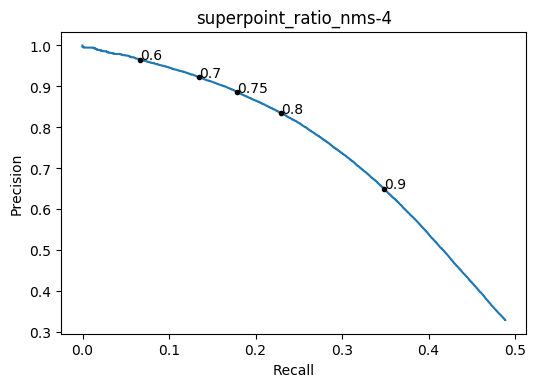